<a href="https://colab.research.google.com/github/ptran1203/gan_project/blob/master/Relation_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

from google.colab import drive
from google.colab.patches import cv2_imshow
import sys
import os
import pickle
import cv2
import keras.backend as K
import tensorflow as tf
import re
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Convolution2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import (
    Input, Dense, Reshape,
    Flatten, Embedding, Dropout,
    BatchNormalization, Activation,
    Lambda,Layer, Add, Concatenate,
    Average,
    MaxPooling2D, AveragePooling2D
)
from keras.utils import np_utils, plot_model
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


drive.mount('/content/drive')
K.common.set_image_dim_ordering('tf')


TensorFlow 1.x selected.


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Model has paramaters: 126609
Compile model with lr:  1e-05
START TRAINING ...
Query size: (950, 10), iters 95
epochs 0/4000 - loss: [0.15327494, 0.0] - 0:00:50.224778s
10000/10000 [==============================] - 27s 3ms/step
[[0.26215565 0.1991216  0.0568085  0.08681756 0.06815216 0.1330764
  0.07553491 0.04872561 0.3738191  0.1404213 ]
 [0.19305435 0.18565139 0.19710347 0.09394324 0.04373983 0.07808584
  0.08296442 0.0865342  0.27918908 0.09634978]
 [0.04521817 0.04796949 0.05484703 0.06730714 0.02497104 0.01796311
  0.02784011 0.0317384  0.13814583 0.03909275]
 [0.1338183  0.1522474  0.018428   0.06534278 0.02449808 0.01830262
  0.0321736  0.04832333 0.29059088 0.04136249]
 [0.15620366 0.2044617  0.05332512 0.10289219 0.02706826 0.08525881
  0.0549655  0.05290741 0.3405443  0.14140716]
 [0.1704675  0.14320973 0.08196425 0.14791745 0.08857372 0.15275338
  0.0932349  0.05729112 0.2893034  0.0611144 ]
 [0.11595708 0.24343807 0.16900861 0.22678497 0.06707624 0.21656913
  0.08050129 0.

<Figure size 432x288 with 0 Axes>

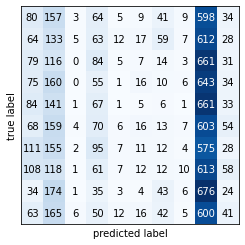

epochs 10/4000 - loss: [0.097066954, 0.1] - 0:00:10.590593s
epochs 20/4000 - loss: [0.09248586, 0.1] - 0:00:10.747411s
epochs 30/4000 - loss: [0.09368022, 0.1] - 0:00:10.746132s
epochs 40/4000 - loss: [0.096282385, 0.0] - 0:00:10.729041s
epochs 50/4000 - loss: [0.09215219, 0.1] - 0:00:10.878393s
10000/10000 [==============================] - 22s 2ms/step
[[0.23351985 0.32328236 0.25152498 0.2854703  0.30853203 0.2020525
  0.23414767 0.2882514  0.310179   0.29706433]
 [0.31859273 0.28598648 0.13898301 0.12304553 0.06039339 0.02284953
  0.1015822  0.10115474 0.4782006  0.10011229]
 [0.05363366 0.1008943  0.03350392 0.03166741 0.0241718  0.01220062
  0.06384337 0.03173438 0.20358416 0.07626241]
 [0.23536319 0.34684873 0.34705326 0.31598455 0.34120572 0.28703386
  0.35763356 0.31413147 0.3240147  0.24044314]
 [0.16356066 0.2817084  0.23727277 0.1558766  0.13854527 0.22954175
  0.2368685  0.21460125 0.27904117 0.26658934]
 [0.15843016 0.1923008  0.10561717 0.1207768  0.07942829 0.08036366
 

<Figure size 432x288 with 0 Axes>

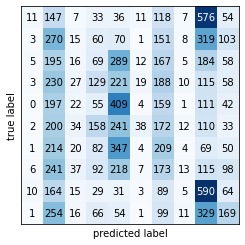

epochs 60/4000 - loss: [0.09432759, 0.1] - 0:00:10.561701s
epochs 70/4000 - loss: [0.08908083, 0.1] - 0:00:10.703660s
epochs 80/4000 - loss: [0.08924247, 0.2] - 0:00:10.693373s
epochs 90/4000 - loss: [0.09146415, 0.1] - 0:00:10.799683s
epochs 100/4000 - loss: [0.09339971, 0.2] - 0:00:10.610711s
10000/10000 [==============================] - 22s 2ms/step
[[0.14542645 0.3397634  0.30814025 0.3243398  0.27203757 0.23699331
  0.27673906 0.2496936  0.197894   0.36842424]
 [0.29101127 0.21296445 0.02990547 0.02189124 0.00288573 0.00069255
  0.01194865 0.0141502  0.459982   0.13854918]
 [0.03900629 0.29038012 0.0198862  0.00903437 0.00241503 0.0011166
  0.03498957 0.02003509 0.26231742 0.27721825]
 [0.2128278  0.3583653  0.33864236 0.33137363 0.28747815 0.23718518
  0.33970755 0.27790058 0.2941166  0.35400558]
 [0.24897751 0.4088265  0.38810775 0.19691947 0.03853178 0.14376938
  0.24347928 0.28542906 0.3922309  0.3992266 ]
 [0.17896199 0.32956895 0.07782209 0.09092849 0.01556009 0.00746691
  

<Figure size 432x288 with 0 Axes>

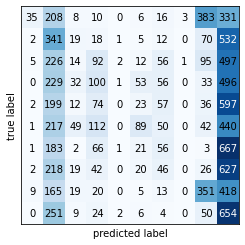

epochs 110/4000 - loss: [0.091598414, 0.2] - 0:00:10.799687s
epochs 120/4000 - loss: [0.08816347, 0.3] - 0:00:10.887133s
epochs 130/4000 - loss: [0.0892782, 0.3] - 0:00:10.911999s
epochs 140/4000 - loss: [0.08109464, 0.4] - 0:00:10.685196s
epochs 150/4000 - loss: [0.08612696, 0.2] - 0:00:10.882409s
10000/10000 [==============================] - 22s 2ms/step
[[0.13393638 0.29279274 0.25367403 0.27080235 0.24728826 0.18154076
  0.27250004 0.24271461 0.1574944  0.39925358]
 [0.29502833 0.1852713  0.0965637  0.03300068 0.00695083 0.00086185
  0.03053936 0.05343503 0.6059501  0.10412851]
 [0.03355575 0.36245215 0.04655421 0.02147597 0.00575197 0.001192
  0.09897158 0.09345186 0.3221724  0.478679  ]
 [0.1775609  0.33237916 0.32842848 0.30430648 0.27988917 0.15974298
  0.32609755 0.28742772 0.2521223  0.30945092]
 [0.14985678 0.41258097 0.276954   0.11202985 0.0195516  0.02815795
  0.1603494  0.15092331 0.43963283 0.47063744]
 [0.1606412  0.29015988 0.06263366 0.10099587 0.01965946 0.0046156


<Figure size 432x288 with 0 Axes>

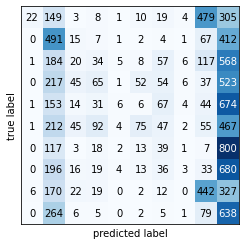

epochs 160/4000 - loss: [0.08604163, 0.2] - 0:00:11.012536s
epochs 170/4000 - loss: [0.08070162, 0.3] - 0:00:11.110066s
epochs 180/4000 - loss: [0.09306506, 0.1] - 0:00:10.945764s
epochs 190/4000 - loss: [0.08657869, 0.4] - 0:00:10.920997s
epochs 200/4000 - loss: [0.082277, 0.1] - 0:00:10.858517s
10000/10000 [==============================] - 22s 2ms/step
[[0.03815258 0.09397054 0.16997927 0.14749652 0.24300629 0.10973403
  0.2663188  0.19084856 0.03011757 0.04772109]
 [0.34759986 0.17721483 0.14944729 0.1337446  0.02658734 0.00207254
  0.06075555 0.09372821 0.6793403  0.04080153]
 [0.00338727 0.311786   0.03061146 0.01899031 0.00618005 0.00069088
  0.12025484 0.05375901 0.15891558 0.2756606 ]
 [0.09061608 0.1580632  0.2543792  0.21513873 0.25609216 0.10858181
  0.35375813 0.24985915 0.12601623 0.03936026]
 [0.05719587 0.29023683 0.25112683 0.3092227  0.07106897 0.10001737
  0.23305047 0.16409573 0.23953381 0.44750524]
 [0.05692205 0.20070124 0.03065524 0.08300304 0.03704032 0.00293151

<Figure size 432x288 with 0 Axes>

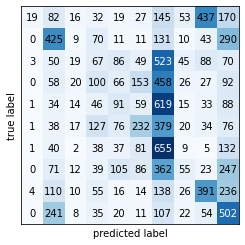

epochs 210/4000 - loss: [0.08290363, 0.4] - 0:00:11.070232s
epochs 220/4000 - loss: [0.07420462, 0.5] - 0:00:10.942324s
epochs 230/4000 - loss: [0.07238557, 0.5] - 0:00:10.849238s
epochs 240/4000 - loss: [0.07173282, 0.4] - 0:00:10.691950s
epochs 250/4000 - loss: [0.07722732, 0.4] - 0:00:10.757736s
10000/10000 [==============================] - 22s 2ms/step
[[1.17129087e-03 1.35696828e-02 8.48174095e-02 9.45869088e-02
  2.05881596e-02 1.20936841e-01 2.26115584e-02 8.34980607e-03
  3.04037333e-03 5.24508953e-03]
 [5.74395657e-02 3.13738763e-01 1.27061069e-01 3.04909050e-02
  7.64891505e-03 2.33948231e-05 2.21877098e-02 4.07582223e-02
  7.08050787e-01 1.81220829e-01]
 [1.93577707e-02 1.43332660e-01 2.26010680e-02 3.41103375e-02
  1.79985762e-02 8.69929790e-05 4.01141942e-02 5.50526679e-02
  1.82570130e-01 8.73624980e-02]
 [7.07348883e-02 1.78051889e-01 2.24732757e-01 2.09582537e-01
  2.00053930e-01 2.19273567e-02 2.25638300e-01 6.98497295e-02
  1.15458071e-01 2.26369202e-02]
 [2.67002583

<Figure size 432x288 with 0 Axes>

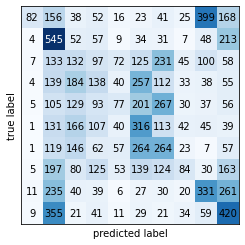

epochs 260/4000 - loss: [0.07208885, 0.5] - 0:00:10.785982s
epochs 270/4000 - loss: [0.0705992, 0.4] - 0:00:10.665020s
epochs 280/4000 - loss: [0.06415901, 0.6] - 0:00:11.028963s
epochs 290/4000 - loss: [0.0732948, 0.3] - 0:00:10.633066s
epochs 300/4000 - loss: [0.0643461, 0.7] - 0:00:10.688295s
10000/10000 [==============================] - 22s 2ms/step
[[6.5807700e-03 9.6404254e-03 1.9284263e-01 2.2564572e-01 4.4596761e-02
  4.1531324e-02 2.1419764e-02 8.2157850e-03 2.4701357e-02 2.8911531e-03]
 [7.8946561e-02 6.5281540e-01 3.0826569e-01 1.6431418e-01 4.1336298e-02
  1.3148785e-04 5.9830070e-02 2.6057124e-02 8.9591926e-01 8.9848101e-02]
 [5.5381060e-03 3.1033742e-01 7.6034367e-02 3.4645289e-02 9.7495317e-03
  7.4774027e-05 1.3506964e-01 4.0516347e-02 4.5568964e-01 1.6682234e-01]
 [4.0549457e-02 4.6590745e-02 2.9963529e-01 2.5786471e-01 1.5456876e-01
  8.1114471e-03 1.8685281e-01 2.5818110e-02 2.7858603e-01 3.5393834e-03]
 [1.6469717e-02 5.5681270e-01 2.4433455e-01 3.0490774e-01 2.297

<Figure size 432x288 with 0 Axes>

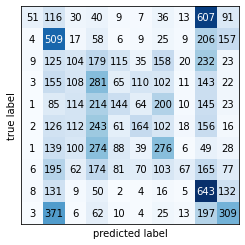

epochs 310/4000 - loss: [0.06848596, 0.5] - 0:00:11.022432s
epochs 320/4000 - loss: [0.06726311, 0.5] - 0:00:10.866655s
epochs 330/4000 - loss: [0.056858845, 0.6] - 0:00:10.795229s
epochs 340/4000 - loss: [0.062197268, 0.6] - 0:00:10.892141s
epochs 350/4000 - loss: [0.055756606, 0.7] - 0:00:10.867050s
10000/10000 [==============================] - 22s 2ms/step
[[1.51544809e-04 3.51694226e-03 1.50714815e-02 7.81633258e-02
  4.01800871e-03 1.43583417e-02 1.37856603e-03 7.24673271e-04
  7.92175531e-04 3.85969877e-04]
 [1.03831589e-02 3.38921428e-01 4.78533208e-02 4.47078943e-02
  1.13612711e-02 2.65240669e-06 1.06459260e-02 1.28880143e-03
  8.90255213e-01 3.88140082e-02]
 [9.26703215e-04 1.92144901e-01 6.46182895e-03 1.11152530e-02
  7.42456317e-03 5.72204590e-06 5.59296012e-02 1.81163251e-02
  1.15998477e-01 5.10682762e-02]
 [6.52074814e-03 3.31401825e-02 1.71360940e-01 1.50104940e-01
  2.19521761e-01 2.39345431e-03 6.54008687e-02 1.22238696e-02
  8.32335353e-02 1.82160735e-03]
 [6.23166

<Figure size 432x288 with 0 Axes>

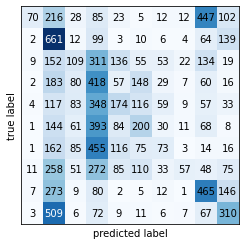

epochs 360/4000 - loss: [0.051620536, 0.7] - 0:00:10.824832s
epochs 370/4000 - loss: [0.051518667, 0.7] - 0:00:10.896075s
epochs 380/4000 - loss: [0.05114464, 0.7] - 0:00:11.051621s
epochs 390/4000 - loss: [0.048121136, 0.7] - 0:00:10.877810s
epochs 400/4000 - loss: [0.05061536, 0.7] - 0:00:10.728435s
10000/10000 [==============================] - 22s 2ms/step
[[2.13479996e-03 5.51164150e-04 3.98527980e-02 1.33922100e-02
  1.16637945e-02 6.35552406e-02 5.42846322e-03 8.23885202e-04
  1.35776401e-03 6.55651093e-05]
 [2.01886594e-01 1.08857572e-01 3.22793961e-01 1.86225832e-01
  5.98489940e-02 1.96939707e-03 4.23261821e-02 1.89977288e-02
  9.29131150e-01 9.28059220e-03]
 [1.20079219e-02 1.19468242e-01 1.83430910e-01 2.26291835e-01
  1.55253559e-01 2.83533335e-03 1.82852060e-01 8.52959454e-02
  4.66426790e-01 1.67187750e-02]
 [1.42218471e-02 9.93257761e-03 4.47799176e-01 3.62479985e-01
  2.08973914e-01 1.97781622e-02 1.12944841e-01 1.37041509e-02
  1.03773385e-01 3.42190266e-04]
 [9.42414

<Figure size 432x288 with 0 Axes>

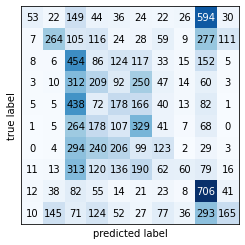

epochs 410/4000 - loss: [0.051870257, 0.7] - 0:00:10.877356s
epochs 420/4000 - loss: [0.044035852, 0.7] - 0:00:10.676916s
epochs 430/4000 - loss: [0.047388803, 0.7] - 0:00:10.750946s
epochs 440/4000 - loss: [0.04796938, 0.7] - 0:00:10.882111s
epochs 450/4000 - loss: [0.043882333, 0.7] - 0:00:10.845885s
10000/10000 [==============================] - 22s 2ms/step
[[2.2501945e-03 1.7212331e-03 9.1232568e-02 1.2301338e-01 1.9780427e-02
  8.7553561e-03 6.0141385e-03 1.0138154e-03 1.5705377e-02 2.4235249e-04]
 [7.1816415e-02 2.6138508e-01 1.2473562e-01 1.8770406e-01 1.3700044e-01
  2.4583936e-04 9.4688177e-02 5.9607327e-03 9.6221566e-01 3.0679166e-02]
 [3.6023259e-03 3.8859177e-01 7.3469996e-02 9.6133262e-02 7.8186750e-02
  7.7545643e-05 2.1232015e-01 3.3705503e-02 4.5988432e-01 7.4118733e-02]
 [6.5173924e-02 6.9709301e-02 4.4702378e-01 3.4195545e-01 5.0303358e-01
  2.2399724e-03 2.1251872e-01 1.7131507e-02 6.9143736e-01 1.4665425e-03]
 [2.1851629e-02 3.8195831e-01 1.8757564e-01 3.3764333e-0

<Figure size 432x288 with 0 Axes>

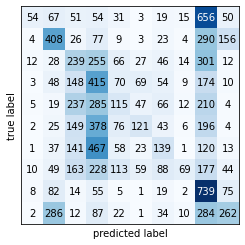

epochs 460/4000 - loss: [0.042012922, 0.7] - 0:00:10.930367s
epochs 470/4000 - loss: [0.03940277, 0.8] - 0:00:11.027341s


In [0]:

BASE_DIR = '/content/drive/My Drive/bagan'
learning_rate = 0.0001
from collections import Counter
import datetime


def pickle_load(path):
    try:
        with open(path, "rb") as f:
            return pickle.load(f)
    except:
        return None

def load_ds(rst, opt):
    path = '{}/imgs_{}_{}.pkl'.format('/content/drive/My Drive/bagan/dataset/save', opt, rst)
    return pickle_load(path)

def generate_data(rst, n_way, k_shot, q_rate = 5, shuffle = False, ds_name = 'cifar10'):
    if ds_name != 'cifar10':
        train_x, train_y = load_ds(rst, 'train')
        test_x, test_y = load_ds(rst, 'test')
        # add 1 channels last
        train_x = np.expand_dims(train_x, axis = -1)
        test_x = np.expand_dims(test_x, axis = -1)
    else:
        ((train_x, train_y), (test_x, test_y)) = tf.keras.datasets.cifar10.load_data()
        # 1 D 
        train_y = train_y[:, 0]
        test_y = test_y[:, 0]
        if n_way < 10:
            # filter classes
            train_idx = np.where(train_y < n_way)[0]
            train_y = train_y[train_idx]
            train_x = train_x[train_idx]
            test_idx = np.where(test_y < n_way)[0]
            test_y = test_y[test_idx]
            test_x = test_x[test_idx]


    train_x = train_x / 255.0
    test_x = test_x / 255.0

    idxs = []
    qidxs = []
    for i in range(n_way):
        idx = np.where(train_y == i)[0]
        np.random.shuffle(idx)
        qidx = idx[k_shot: q_rate*k_shot]
        idxs.append(idx[:k_shot])
        qidxs.append(qidx)

    c_idx = np.concatenate(idxs)
    q_idx = np.concatenate(qidxs)

    np.random.shuffle(q_idx)

    if shuffle:
        np.random.shuffle(c_idx)
        print('shuffled !!')

    q_x = train_x[q_idx]
    q_y = train_y[q_idx]

    train_x = train_x[c_idx]
    train_y = train_y[c_idx]

    train_y = np_utils.to_categorical(train_y, n_way)
    q_y = np_utils.to_categorical(q_y, n_way)
    test_y = np_utils.to_categorical(test_y, n_way)

    idx = np.arange(test_x.shape[0])
    np.random.shuffle(idx)
    # idx = idx
    return (train_x, train_y), (q_x, q_y), (test_x[idx], test_y[idx])

class RelationNet():
    def __init__(self, img_rst, c_way, k_shot, channels):
        self.rst = img_rst
        self.c_way = c_way
        self.k_shot = k_shot
        self.channels = channels
        self.build_model()


    def evaluate(self, support_x, test_x, test_y):
        support_x = np.expand_dims(support_x, axis = 0)
        support_x = np.repeat(
            support_x, test_x.shape[0], axis= 0
        )
        loss = self.model.evaluate([support_x, test_x], test_y)
        y_pre = self.model.predict([support_x, test_x])
        print(y_pre[:10])
        y_pre = np.argmax(y_pre, axis=1)
        test_y = np.argmax(test_y, axis=1)
        print(loss)
        print('ACC: {}%'.format(round(loss[1], 2)* 100))
        cm = metrics.confusion_matrix(y_true=test_y, y_pred=y_pre)  # shape=(12, 12)
        plt.figure()
        plot_confusion_matrix(cm, hide_ticks=True,cmap=plt.cm.Blues)
        plt.show()

    def _embedding_module(self):
        model = Sequential()

        model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        # model.add(MaxPooling2D())
        model.add(Dropout(0.3))
    
        model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        # model.add(MaxPooling2D())
        model.add(Dropout(0.3))

        # model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1)))
        # model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))
        return model

    def _relation_module(self):
        model = Sequential()

        model.add(Conv2D(filters=64,
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding='same',
                        activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D())

        model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding='same',
                        activation='relu'))
        model.add(BatchNormalization())
        # model.add(MaxPooling2D())

        model.add(Flatten())
        model.add(Dropout(0.2))

        model.add(Dense(8, activation='relu' ))
        model.add(Dense(1, activation='sigmoid'))
        return model

    def build_model(self):
        img_size = self.rst
        c_way = self.c_way
        k_shot = self.k_shot
        support_size = c_way * k_shot
        embedding_module = self._embedding_module()
        relation_module = self._relation_module()
    
        support_img = Input((support_size, img_size, img_size, self.channels))
        img = Input((img_size, img_size, self.channels))

        feature = embedding_module(img)
        support_features = [[] for i in range(c_way)]

        idx = 0
        for classid in range(c_way):
            for _ in range(k_shot):
                support_features[classid].append(
                    embedding_module(Lambda(lambda x: x[:,idx,:,:,:])(support_img))
                )
                idx += 1

        relation_scores = []

        for classid in range(c_way):
            sfeatures = Average()(support_features[classid])
            concat_features = Concatenate()([sfeatures, feature])
            relation_scores.append(relation_module(concat_features))

        outputs = Concatenate()(relation_scores)

        self.model = Model(inputs = [support_img, img], outputs = outputs)
        self.model.compile(optimizer = Adam(lr=learning_rate), loss = 'mse', metrics=['accuracy'])
        print('Model has paramaters: {}'.format(self.model.count_params()))
        print('Compile model with lr: ', learning_rate)
        # self.plot()

    def plot(self):
        plot_model(self.model, to_file='/content/drive/My Drive/bagan/rn_model.png')

    def summary(self):
        self.model.summary()

    def clean_pred(self, one_hot_pred):
        ll = []
        for pred in list(one_hot_pred):
            pred = list(pred)
            ll.append(pred.index(max(pred)))
        return ll

    def train(self, dataset, query_imgs, testset, epochs = 100, batch_size=5, ):
        train_x, train_y = dataset
        q_x, q_y = query_imgs
        test_x, test_y = testset
        trainX = np.expand_dims(train_x, axis = 0)
        iters = q_x.shape[0] // batch_size
        
        print('START TRAINING ...')
        print('Query size: {}, iters {}'.format(q_y.shape, iters))
        for i in range(epochs):
            start_time = datetime.datetime.now()
            for j in range(iters):
                f, t =  batch_size * j, min(batch_size * (j + 1), q_y.shape[0])
                qX, qY = q_x[f:t], q_y[f:t]
                # idx = np.arange(qY.shape[0])
                # np.random.shuffle(idx)
                # qX, qY = q_x[idx], q_y[idx]
                trainXrp = np.repeat(
                    trainX, qX.shape[0], axis= 0
                )

                loss = self.model.train_on_batch([trainXrp, qX], qY)

            if i % 10 == 0:
                print('epochs {}/{} - loss: {} - {}s' .format(
                    i, epochs, loss,
                    datetime.datetime.now() - start_time,
                ))

            if i % 50 == 0:
                self.evaluate(train_x, test_x, test_y)


c_way, k_shot = 10, 5
learning_rate = 1e-5
ds_name = 'cifar10'
channels = 1 if ds_name != 'cifar10' else 3
rst = 64 if ds_name != 'cifar10' else 32 # chest_xray or cifa10

dataset, query_imgs, testset = generate_data(
    rst,
    c_way,
    k_shot,
    q_rate = 20,
    shuffle = False,
    ds_name = ds_name
)

rn_model = RelationNet(rst, c_way, k_shot, channels = channels)
rn_model.train(dataset, query_imgs, testset, epochs = 4000, batch_size = 10)
# rn_model.evaluate(dataset[0], dataset[0], dataset[1])


621/621 [==============================] - 1s 1ms/step
[[0.06165013 0.99915826]
 [0.16362587 0.7955735 ]
 [0.08242849 0.9891289 ]
 [0.06008947 0.9995235 ]
 [0.59836364 0.9240829 ]
 [0.03643724 0.9474263 ]
 [0.5664755  0.9999016 ]
 [0.00674048 0.9925341 ]
 [0.04277244 0.9983134 ]
 [0.02969095 0.9977678 ]]
[0.30892631433148315, 0.6666666669546119]
ACC: 67.0%


<Figure size 432x288 with 0 Axes>

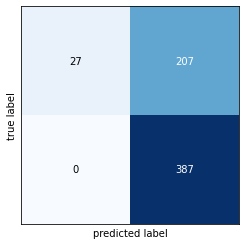

[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
Counter({0: 145, 1: 145})
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


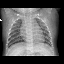

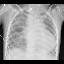

In [0]:
# rn_model.train(dataset, query_imgs, testset, 1000, batch_size=20)
rn_model.evaluate(dataset[0], testset[0], testset[1])

# dataset, query_imgs, testset = generate_data(
#     rst ,
#     c_way,
#     k_shot,
#     q_rate = 15,
#     shuffle = True
# )

def clean_pred(one_hot_pred):
    ll = []
    for pred in list(one_hot_pred):
        pred = list(pred)
        ll.append(pred.index(max(pred)))
    return ll

qx, qy = query_imgs
train_x, train_y = dataset
lables = clean_pred(qy)
print((lables))
print(Counter(lables))

# qx = qx * 255
train_x = train_x * 255
print(train_y)
cv2_imshow(train_x[1])
# cv2_imshow(train_x[4])
cv2_imshow(train_x[5])



In [0]:
for classid in range(10):
    for _ in range(5):
        print('class {} shot {}'.format(classid, _))